In [1]:
!pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.decomposition import PCA

%matplotlib inline


In [4]:
# to display all columns and rows:
pd.set_option('display.max_columns', None)
data=pd.read_csv("churns.csv")
data.head()

Unnamed: 0      X1     X12  X13  X14  X15   X17  X19   X20  X21  X22  X23  \
0           0  1103.0  1103.0  0.0  0.0  1.0  13.0  1.0  16.0  6.0  1.0  0.0   
1           1  1136.0  1136.0  0.0  0.0  1.0  12.0  6.0  15.0  7.0  0.0  0.0   
2           2  1382.0  1382.0  0.0  0.0  1.0  12.0  1.0  14.0  7.0  1.0  0.0   
3           3  2417.0  1135.0  0.0  0.0  1.0  14.0  1.0  13.0  8.0  1.0  0.0   
4           4  1405.0  1405.0  0.0  0.0  1.0  12.0  2.0  11.0  7.0  0.0  0.0   

   X24  X25  X26  X27  Target_ChurnFlag  X32  X33  X49  X57  X58  X59  X60  \
0  0.0  0.0  0.0  1.0               1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.0  0.0  0.0  1.0               0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
2  0.0  0.0  0.0  1.0               0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  1.0               1.0  0.0  0.0  0.0  0.0  5.0  6.0  1.0   
4  0.0  0.0  0.0  1.0               0.0  0.0  0.0  0.0  0.0  3.0  4.0  1.0   

   X61  X62  X63  X64       X65       X66  X67  X68  X69  X70  X71  X72  X73  \
0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.000000  0.000000  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  6.0  3.0  0.0  2.0  1.666667  0.666667  6.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  4.0  2.0  0.0  1.0  2.500000  0.500000  4.0  0.0  0.0  0.0  0.0  0.0  2.0   

   X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84     X85  X88  X89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  2206.0  1.0  1.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  2272.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  2764.0  3.0  3.0   
3  4.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  2270.0  1.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  2810.0  2.0  2.0   

   X90  X91  X92  X93  X94  X95  X96  X97   X98  X102  X103  X104  X105  X106  \
0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  25.0  25.0  25.0  25.0   0.0   1.0   
1  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  46.0  46.0  46.0  46.0   0.0   0.0   
2  2.0  1.0  2.0  0.0  1.0  1.0  0.0  2.0  41.0  44.0  41.0  47.0   1.0   2.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  28.0  28.0  28.0  28.0   0.0   1.0   
4  2.0  1.0  2.0  0.0  1.0  1.0  0.0  2.0  47.0  46.0  45.0  47.0   1.0   2.0   

      X107  X109  X110  X111  X112  X113  X114  X115  X116  X117    X118  \
0  42000.0   9.0   4.0   8.0   0.0   0.0   1.0   1.0   1.0   2.0   714.0   
1      0.0   9.0   4.0   8.0   0.0   0.0   1.0   1.0   1.0   2.0   714.0   
2  66360.0  18.0   5.0  16.0   2.0   0.0   1.0   1.0   1.0   1.0  1060.0   
3      0.0   9.0   4.0   8.0   0.0   0.0   1.0   1.0   1.0   3.0   714.0   
4  57320.0  12.0   4.0  16.0   0.0   0.0   1.0   1.0   1.0   3.0  1041.0   

     X119  X120  X121  X134  X135  X136       X137  X138  X139  X140  X141  \
0   714.0   1.0   1.0  15.0   0.0   9.0  11.133333   5.0  14.0   1.0   7.0   
1   714.0   1.0   1.0  14.0   0.0   2.0   8.465911   4.0  13.0   0.0  16.0   
2  1060.0   2.0   2.0  13.0   0.0  10.0  11.384615   6.0  15.5   1.0  20.0   
3   714.0   1.0   1.0  12.0   1.0   8.0   8.666667   2.0  14.0   2.0  54.0   
4  1041.0   2.0   2.0  10.0   0.0   7.0  10.200000   0.0  14.0   3.0  13.0   

       X142  X143  X144  X145  X146     X147   X148       X150 X151     X153  \
0  0.555556   5.0   0.0   9.0   0.0  40004.0  240.0  Riverside   CA  40004.0   
1  0.176471   7.0   0.0  17.0   1.0  40004.0  240.0  Riverside   CA  40004.0   
2  0.714286  15.0   0.0  21.0   1.0  40004.0  240.0  Riverside   CA  40004.0   
3  1.293103  43.0   0.0  58.0   4.0  40004.0  240.0  Riverside   CA  40004.0   
4  1.050000  16.0   0.0  20.0   4.0  40004.0  240.0  Riverside   CA  40004.0   

          X154 X155    X156      X157             X158  X159   X160  X161  \
0  Other Socal    B  Garden  suburban  university city   0.0  312.0  16.0   
1  Other Socal    B  Garden  suburban  university city 

In [5]:
# full correlation table
data.corr().style.background_gradient(cmap='viridis')

C:\Users\VIVEK KR\anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\VIVEK KR\anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


- The NaN in this case is interpreted as no correlation between the variables.

In [3]:
#droping columns
data=data.drop(['Unnamed: 0','X158','X155'],axis=1)


In [8]:
data.shape

(166171, 147)

In [6]:
cat_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_col.append(col)
cat_col        

['X150', 'X151', 'X154', 'X156', 'X157']

In [7]:
num_col=[]
for col in data.columns:
    if data[col].dtype=='int' or data[col].dtype=='float':
        num_col.append(col)
        
num_col     

['X1',
 'X12',
 'X13',
 'X14',
 'X15',
 'X17',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'Target_ChurnFlag',
 'X32',
 'X33',
 'X49',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X72',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X121',
 'X134',
 'X135',
 'X136',
 'X137',
 'X138',
 'X139',
 'X140',
 'X141',
 'X142',
 'X143',
 'X144',
 'X145',
 'X146',
 'X147',
 'X148',
 'X153',
 'X159',
 'X160',
 'X161',
 'X162',
 'X163',
 'X166',
 'X167',
 'X168',
 'X171',
 'X172',
 'X173',
 'X174',
 'X175',
 'X176',
 'X177',
 'X178',
 'X179',
 'X180',
 'X181',
 'X182',
 'X183',
 'X184',
 'X

In [8]:
# dummy encode the categorical columns
data = pd.concat([data,pd.get_dummies(data[cat_col], drop_first=True)], axis=1)

# drop the original columns
data.drop(cat_col, axis=1, inplace=True)

In [12]:
data.shape

(166171, 253)

In [9]:
# prepare the dataset
X = data.drop('Target_ChurnFlag', axis=1)
y = data['Target_ChurnFlag']

### Split into train test

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=12) #forgot to add stratification parameter to improve accuracy
print(X_train.shape, Y_train.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(124628, 252) (124628,)
(41543, 252) (41543,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled.shape,X_test_scaled.shape

((124628, 252), (41543, 252))

In [11]:
X_train_scaled.shape

(124628, 252)

In [19]:
#initialize the pca with randomized 
pca = PCA(random_state=12)
# fit the training dataset
pca.fit(X_train_scaled)

PCA(random_state=12)

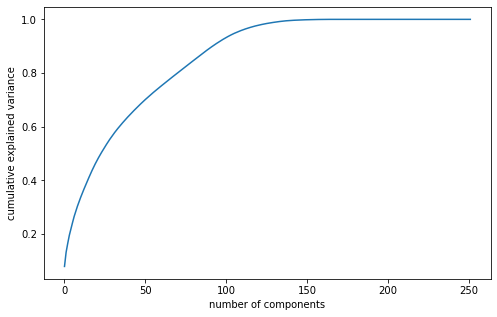

In [20]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [12]:
# Initialize pca preserving 95% of the variability in data
pca = PCA(n_components=0.95,random_state=12)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train_scaled)
# transform the testing dataset
X_test_pca = pca.transform(X_test_scaled)


In [22]:
X_train_pca.shape,X_test_pca.shape

((124628, 107), (41543, 107))

In [11]:
!pip install hickle

In [19]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Logistic Regression

In [25]:
# Initialize the Logistic regression
model_lr = LogisticRegression(random_state=12,n_jobs=-1)
# fit the pca training data
model_lr.fit(X_train_pca, Y_train)
train_hat_lr=model_lr.predict(X_train_pca)
# predict the testing pca data
Y_pred_lr = model_lr.predict(X_test_pca)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat_lr)
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred_lr)


train accuracy: 
Accuracy Score :  62.7
ROC AUC score :  57.28
Precision score :  56.27
Recall score :  30.2
test accuracy: 
Accuracy Score :  62.51
ROC AUC score :  57.37
Precision score :  56.59
Recall score :  30.65


### Hyperparameter tuning

In [40]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# run RandomizedSearchCV search
random_search = RandomizedSearchCV(estimator= model_lr,
                           param_distributions= param_grid,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose=2,
                           cv = 5)

random_search.fit(X_train_pca,Y_train)
best_accuracy = random_search.best_score_

best_estimator = random_search.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best estimator:", best_estimator)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\VIVEK KR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.62570213        nan 0.62571015 0.61313672 0.62571015 0.62571015
 0.61313672 0.62570213 0.62570213 0.6257583 ]
  warnings.warn(


Best Accuracy: 62.58 %
Best estimator: LogisticRegression(C=0.03359818286283781, max_iter=5000, n_jobs=-1,
                   random_state=12, solver='saga')


In [41]:
# Initialize the Logistic regression
model_lr = LogisticRegression(C=0.03359818286283781, max_iter=5000, n_jobs=-1,
                   random_state=12, solver='saga')
# fit the pca training data
model_lr.fit(X_train_pca, Y_train)
train_hat_lr=model_lr.predict(X_train_pca)
# predict the testing pca data
Y_pred_lr = model_lr.predict(X_test_pca)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat_lr)
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred_lr)

train accuracy: 
Accuracy Score :  62.7
ROC AUC score :  57.28
Precision score :  56.28
Recall score :  30.2
test accuracy: 
Accuracy Score :  62.52
ROC AUC score :  57.37
Precision score :  56.6
Recall score :  30.64


## RandomForest

In [35]:
# initialize the randomforest
model = RandomForestClassifier(random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)


train accuracy
Accuracy Score :  100.0
ROC AUC score :  100.0
Precision score :  100.0
Recall score :  100.0
test accuracy
Accuracy Score :  61.98
ROC AUC score :  56.07
Precision score :  56.47
Recall score :  25.41


In [15]:

# initialize the randomforest
model = RandomForestClassifier(max_depth=5,max_features=0.35,random_state=12)
# fit the pca training data
model.fit(X_train_pca, e)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

train accuracy
Accuracy Score :  61.15
ROC AUC score :  51.9
Precision score :  66.67
Recall score :  5.71
test accuracy
Accuracy Score :  60.75
ROC AUC score :  51.83
Precision score :  66.79
Recall score :  5.5


### Hyperparameter tuning

In [39]:
# specify parameters space
parameters = [{'n_estimators':[10,20,30,40,50,60,70],
               'max_depth': [3,4,5,7],
               'criterion':['entropy','gini'],
               'min_samples_split':[5,4,6,7,8],
                "bootstrap": [True, False],
               'max_features':['auto', 'sqrt', 'log2']
               }]
# run RandomizedSearchCV search
random_search = RandomizedSearchCV(estimator= model,
                           param_distributions= parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose=2,
                           cv = 5)

random_search.fit(X_train_pca,Y_train)
best_accuracy = random_search.best_score_
best_param=random_search.best_params_
best_estimator = random_search.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best estimator:", best_estimator)
print("Best Parameters:", best_estimator)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 60.52 %
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=5,
                       n_estimators=70, random_state=12)
Best Parameters: RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=5,
                       n_estimators=70, random_state=12)


In [42]:
# initialize the randomforest
model = RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=5,
                       n_estimators=70, random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)

train accuracy
Accuracy Score :  60.65
ROC AUC score :  50.98
Precision score :  72.04
Recall score :  2.65
test accuracy
Accuracy Score :  60.18
ROC AUC score :  50.84
Precision score :  69.55
Recall score :  2.4


## GradientBoosting

In [30]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
#model_score_list.append({'model_name':'GradientBoostingClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

train accuracy
Accuracy Score :  63.17
ROC AUC score :  56.4
Precision score :  60.65
Recall score :  22.54
test accuracy
Accuracy Score :  62.18
ROC AUC score :  55.71
Precision score :  58.32
Recall score :  22.1


## XGBoosting

In [44]:
# Initialize the XGBoost
model5 = XGBClassifier(random_state=12,n_jobs=-1)
# fit the pca training data
model5.fit(X_train_pca, Y_train)
train_hat=model5.predict(X_train_pca)
# predict the pca testing data
Y_pred = model5.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)


C:\Users\VIVEK KR\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy
Accuracy Score :  73.44
ROC AUC score :  69.65
Precision score :  74.75
Recall score :  50.73
test accuracy
Accuracy Score :  62.31
ROC AUC score :  58.06
Precision score :  55.07
Recall score :  36.03


### Hyper parameter tuning

In [ ]:
model_xg = XGBClassifier(random_state=12,n_jobs=-1)
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

#create the RandomizedSearchCV
xgb_rscv = RandomizedSearchCV(model_xg, param_distributions = parameters, scoring="accuracy",
                             cv=3,n_jobs = -1, verbose=3, random_state=12)
xgb_rscv.fit(X_train_pca,Y_train)
best_accuracy = xgb_rscv.best_score_

best_estimator = random_search.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best estimator:", best_estimator)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


## KNN

In [14]:
# initialize the KNeighbors classifiers
model_knn = KNeighborsClassifier(n_jobs=-1)
# fit the pca training data
model_knn.fit(X_train_pca, Y_train)
train_hat=model_knn.predict(X_train_pca)
# predict the pca testing data
Y_pred = model_knn.predict(X_test_pca)


# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
#model_score_list.append({'model_name':'KNeighborsClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  73.69
ROC AUC score :  71.28
Precision score :  70.29
Recall score :  59.26
Accuracy Score :  59.19
ROC AUC score :  56.24
Precision score :  49.34
Recall score :  40.9


### Feature Importance

In [13]:
dc=DecisionTreeClassifier()
dc.fit(X,y)

DecisionTreeClassifier()

In [14]:
pd.set_option('display.max_row', None)
dc.feature_importances_
df=pd.DataFrame({"Feature_names":X.columns,"importance":dc.feature_importances_})
df.sort_values(by="importance",ascending=False)

Feature_names  importance
57                      X98    0.043067
46                      X85    0.032675
100                    X168    0.027385
136                    X212    0.024551
80                     X137    0.023525
98                     X166    0.022431
85                     X142    0.022255
0                        X1    0.021238
139                    X215    0.020817
104                    X174    0.020604
131                    X201    0.019407
130                    X200    0.019167
8                       X21    0.018894
103                    X173    0.018746
66                     X111    0.018250
6                       X19    0.017704
58                     X102    0.017497
129                    X199    0.016895
63                     X107    0.016888
133                    X203    0.015845
64                     X109    0.015194
99                     X167    0.015114
60                     X104    0.014304
84                     X141    0.014173
134                    X204    0.014071
59                     X103    0.013650
88                     X145    0.013622
86                     X143    0.013577
81                     X138    0.012250
112                    X182    0.011789
1                       X12    0.011764
26                      X65    0.009605
73                     X118    0.009514
79                     X136    0.009332
74                     X119    0.009216
102                    X172    0.009044
83                     X140    0.008659
101                    X171    0.008595
138                    X214    0.008306
96                     X162    0.008265
91                     X148    0.008217
120                    X190    0.008208
45                      X84    0.007985
111                    X181    0.007791
114                    X184    0.007312
105                    X175    0.007191
121                    X191    0.007178
7                       X20    0.007067
82                     X139    0.006889
67                     X112    0.006775
77                     X134    0.006596
89                     X146    0.006572
17                      X49    0.006550
107                    X177    0.006326
95                     X161    0.006316
90                     X147    0.006258
9                       X22    0.006219
72                     X117    0.006158
137                    X213    0.006133
122                    X192    0.005990
124                    X194    0.005967
140        monthly_lease_X0    0.005954
113                    X183    0.005890
65                     X110    0.005633
94                     X160    0.005523
78                     X135    0.005398
108                    X178    0.005244
97                     X163    0.005227
106                    X176    0.005182
92                     X153    0.005155
109                    X179    0.005109
25                      X64    0.005089
71                     X116    0.005038
27                      X66    0.005013
123                    X193    0.004928
5                       X17    0.004790
18                      X57    0.004635
127                    X197    0.004541
54                      X95    0.004508
35                      X74    0.004452
61                     X105    0.004439
28                      X67    0.004180
69                     X114    0.003957
53                      X94    0.003796
20                      X59    0.003497
19                      X58    0.003470
22                      X61    0.003397
62                     X106    0.003195
34                      X73    0.002995
36                      X75    0.002993
47                      X88    0.002873
68                     X113    0.002743
23                      X62    0.002603
41                      X80    0.002526
38                      X77    0.002409
48                      X89    0.002290
56                      X97    0.002176
50                      X91    0.002135
37                      X76    0.002009
51            

In [17]:
#droping features basEd on feature importance
data=data.drop(["X187","X186","X185","X26","X68","X15","X14","X13","X27","X32","X33","X144","X188","X69","X70","X25","X71","X72","X189"],axis=1)

In [20]:
# initialize the randomforest
model = RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=5,
                       n_estimators=70, random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)

train accuracy
Accuracy Score :  60.65
ROC AUC score :  50.98
Precision score :  72.04
Recall score :  2.65
test accuracy
Accuracy Score :  60.18
ROC AUC score :  50.84
Precision score :  69.55
Recall score :  2.4
